In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Circle
from matplotlib.collections import PatchCollection

from astropy.io import fits

import seaborn as sns

sns.set(context="talk", style="white", color_codes=True, palette="husl")

In [2]:
def circle_packing(center, radius, points, centers_precision=2, threshold=0.6):
    hexagon = RegularPolygon(center, 6, 2*radius, np.pi/2, lw=1, fc="none", ec="0.5")
    points_in_hexagons = hexagon.contains_points(points)

    hexagons, centers = [hexagon], [center]
    while not np.all(points_in_hexagons):
        new_hexagons = []
        for hexagon in hexagons:
            new_centers = hexagon.get_verts()
            for new_center in new_centers:
                new_hexagon = RegularPolygon(new_center, 6, 2*radius, np.pi/2, lw=1, fc="none", ec="0.5")
                points_in_hexagons = np.logical_or(points_in_hexagons, new_hexagon.contains_points(points))
                new_hexagons.append(new_hexagon)
            centers.extend(new_centers)
        hexagons = new_hexagons
        print(f"covered spaxels / total = {points_in_hexagons.sum():>4d} / {len(points)}")

    centers = np.unique(np.round(centers, centers_precision), axis=0)
    return centers

covered spaxels / total = 1086 / 3389
covered spaxels / total = 2431 / 3389
covered spaxels / total = 3389 / 3389


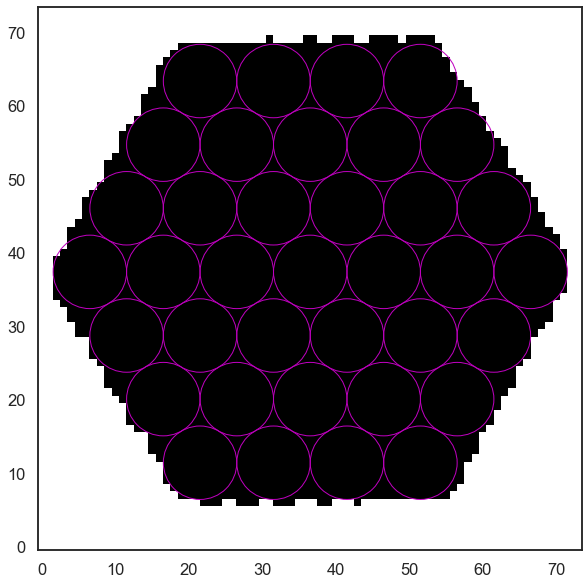

In [3]:
VOXEL_RADIUS = 2.5 # arcsec
MANGA_SCALE = 0.5 # arcsec/pix
MANGA_PATH = "../../_fitting-data/IC342/"

data = fits.getdata(os.path.join(MANGA_PATH, "manga-10492-12705.cube.fits.gz"))

ifu = (np.nan_to_num(data)!=0).any(axis=0)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect("equal")

im = ax.imshow(ifu, origin="lower", cmap="binary")
# plt.colorbar(im)

radius = VOXEL_RADIUS / MANGA_SCALE

points = np.column_stack(np.where(ifu.T))# + 0.5
center = np.mean(points, axis=0)
# circle = Circle(center, 2*radius, lw=1, fc="none", ec="0.1", ls="--")

centers = circle_packing(center, radius, points+0.5)

# hexagons = [[RegularPolygon(center, 6, 2*radius, np.pi/2, lw=1, fc="none", ec="0.5")]]
# centers = np.atleast_2d(center).round(2)
# hexagons, centers = recursive_circle_packing(hexagons, centers, radius, points+0.5)
# ax.add_collection(PatchCollection(hexagons, fc="none", lw=1, ec="0.5"))

for new_center in centers:
    ax.add_patch(Circle(new_center, radius, lw=1, fc="none", ec="m"))